<a href="https://colab.research.google.com/github/knaat/UCI-Heart-disease/blob/main/JADS_Discover_PIMA_Indians_Diabetes_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://github.com/jads-nl/discover-projects/blob/main/pima-indians-diabetes/women-Pima-shinny-game-field-hockey.jpg)
# Pima Indians Diabetes dataset

Predict the onset of diabetes based on diagnostic measures.

## Data description
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1)

## Exercises

### Exercise 1
 - Provide a table with descriptive statistics for all included variables and check:
   - Classes of each of the variables (e.g. factors or continuous variables).
   - Change the class of the "Outcome" variable such that it is a binary factor
   - Descriptive/summary statistics for all continuous variables (e.g. mean, SD, range) and factor variables (e.g. frequencies).
 - Explore missing values
 
### Exercise 2
The variable "Outcome" refers to the presence of diabetes and hence is the variable of interest for our prediction model ("Y" or dependent variable). The frequency of the outcomes (diabetes yes/no) was already determined in the previous code block Please further explore Y in terms of:

  - Describe X-variables separately for both outcome categories 
  - Draw a correlation plot to see all correlations between Y and the independent (numeric) variables 
  - Visualize the relation between Y and a few correlated X-variables 

### Exercise 3
  - Estimate a linear model, LASSO model and a kNN model on the train set. Inspect the outcomes of the model. Which model performs best?
  - Interpret the different models and argue which one is more easily explainable. Use any of the following libraries for interpreting models: [SHAP](https://shap.readthedocs.io/en/latest/), [lime](https://github.com/marcotcr/lime), [sklearn partial dependence plot](https://scikit-learn.org/stable/modules/partial_dependence.html), [ELI5](https://eli5.readthedocs.io/en/latest/)
  

## Acknowledgements
**Spoiler alert:** the links below contain solutions to this project. Make sure you have tried your best before snooping.
  - [PIR's complete ML pipeline tutorial](https://www.kaggle.com/pouryaayria/a-complete-ml-pipeline-tutorial-acu-86)
  - [Ashwini Swain's](https://www.kaggle.com/ash316) has written a [notebook with a comprehensive explaination](https://www.kaggle.com/ash316/ml-from-scratch-part-2)
  - [Parul Pandey's](https://www.kaggle.com/parulpandey) notebook with an excellent explanation of [interpreting machine learning models](https://www.kaggle.com/parulpandey/intrepreting-machine-learning-models).




References used:



In [1]:
# we want to use sklearn >= 0.23 for visualizing pipelines
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.23.2)


In [2]:
import os
import warnings

import pandas as pd
print('\nUsing Pandas version\t',pd.__version__)

import numpy as np
print('Using Numpy version\t',np.version.version)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
print('Using Matplotlib version',matplotlib.__version__)

import seaborn as sns
print('Using Seaborn version\t',sns.__version__)

import sklearn

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm


from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

print('Using ScikitLearn version', sklearn.__version__)



Using Pandas version	 1.1.5
Using Numpy version	 1.18.5
Using Matplotlib version 3.2.2
Using Seaborn version	 0.11.0
Using ScikitLearn version 0.23.2


In [3]:
def expl_df(df_input, name):
    
    """ Prints analysis of dataframe 'df_input' with name 'name' and returns lists of numeric, categorical, complete,
        incomplete features, features with many zeros and features with high skew > 0.75. """

    print('\n\033[1mDataframe analysis for dataframe:  ',name,'\033[0m\n')

    # Print dimensions of dataframe
    num_rows = df_input.shape[0]
    num_cols = df_input.shape[1]
    print('Dataframe',name,'has', num_rows, 'rows and', num_cols,'columns\n')

    # Check which features are numeric and which features are categorical 
    num_features = list(df_input.select_dtypes(include=['int64','float64']).columns)
    cat_features = list(df_input.select_dtypes(include=['object', 'category']).columns)
    print('Dataframe',name,'has', len(num_features) , 'numeric features and', len(cat_features),'categorical features\n')

    # Check which features have missing values and might need attention and print number of features
    count_values_feature=df_input.count()

    complete_features = list(count_values_feature[count_values_feature == num_rows].index)
    incomplete_features = list(count_values_feature[count_values_feature < num_rows].index)
    print('Dataframe',name,'has',len(complete_features), 'complete features and', len(incomplete_features),'incomplete features\n')

    # Calculate skew for each numeric feature and select features with skew>0.75 
    calc_skew_feature = df_input[num_features].skew()
    skew_features = list(calc_skew_feature[calc_skew_feature > 0.75].index)
    print('Dataframe',name,'has',len(skew_features), 'numeric features with a skew > 0.75\n')
    
    return num_features, cat_features, incomplete_features, complete_features,skew_features

In [4]:
#
# Read PIMA Indians Diabetes dataset
#

df = pd.read_csv("https://raw.githubusercontent.com/jads-nl/discover-projects/main/pima-indians-diabetes/diabetes.csv")


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
num_feat,cat_feat,incomp_feat,comp_feat,skew_feat = expl_df(df,'df')


Dataframe analysis for dataframe:   df 

Dataframe df has 768 rows and 9 columns

Dataframe df has 9 numeric features and 0 categorical features

Dataframe df has 9 complete features and 0 incomplete features

Dataframe df has 4 numeric features with a skew > 0.75



In [8]:
skew_feat

['Pregnancies', 'Insulin', 'DiabetesPedigreeFunction', 'Age']

### First pass analysis

* 8 features and one target. Data on 768 individuals. 

* All features are numeric.

* No missing vales. 

* 4 features have a skewed distribution. 

In [9]:
#
# Splitting dataset in 2 parts (target==0 and target==1) for separate analysis
#
df_outcome_0 = df.drop(df[df['Outcome'] == 1].index, inplace=False).copy()
df_outcome_1 = df.drop(df[df['Outcome'] == 0].index, inplace=False).copy()

In [10]:
print(f"Description of features for outcome==0\n") 
df_outcome_0.describe().transpose()

Description of features for outcome==0



,count,mean,std,min,25%,50%,75%,max
Pregnancies,500.0,3.298000,3.017185,0.000,1.00000,2.000,5.00000,13.000
Glucose,500.0,109.980000,26.141200,0.000,93.00000,107.000,125.00000,197.000
BloodPressure,500.0,68.184000,18.063075,0.000,62.00000,70.000,78.00000,122.000
SkinThickness,500.0,19.664000,14.889947,0.000,0.00000,21.000,31.00000,60.000
Insulin,500.0,68.792000,98.865289,0.000,0.00000,39.000,105.00000,744.000
BMI,500.0,30.304200,7.689855,0.000,25.40000,30.050,35.30000,57.300
DiabetesPedigreeFunction,500.0,0.429734,0.299085,0.078,0.22975,0.336,0.56175,2.329
Age,500.0,31.190000,11.667655,21.000,23.00000,27.000,37.00000,81.000
Outcome,500.0,0.000000,0.000000,0.000,0.00000,0.000,0.00000,0.000


In [11]:
print(f"Description of features for outcome==1\n") 
df_outcome_1.describe().transpose()

Description of features for outcome==1



,count,mean,std,min,25%,50%,75%,max
Pregnancies,268.0,4.865672,3.741239,0.000,1.7500,4.000,8.000,17.00
Glucose,268.0,141.257463,31.939622,0.000,119.0000,140.000,167.000,199.00
BloodPressure,268.0,70.824627,21.491812,0.000,66.0000,74.000,82.000,114.00
SkinThickness,268.0,22.164179,17.679711,0.000,0.0000,27.000,36.000,99.00
Insulin,268.0,100.335821,138.689125,0.000,0.0000,0.000,167.250,846.00
BMI,268.0,35.142537,7.262967,0.000,30.8000,34.250,38.775,67.10
DiabetesPedigreeFunction,268.0,0.550500,0.372354,0.088,0.2625,0.449,0.728,2.42
Age,268.0,37.067164,10.968254,21.000,28.0000,36.000,44.000,70.00
Outcome,268.0,1.000000,0.000000,1.000,1.0000,1.000,1.000,1.00


### Analysis of features split out by target

* Mean for all features is higher for Outcome=1 than for Outcome=0

* 2/3 of measurements => Outcome=0, 1/3 of measurements => Outcome=0



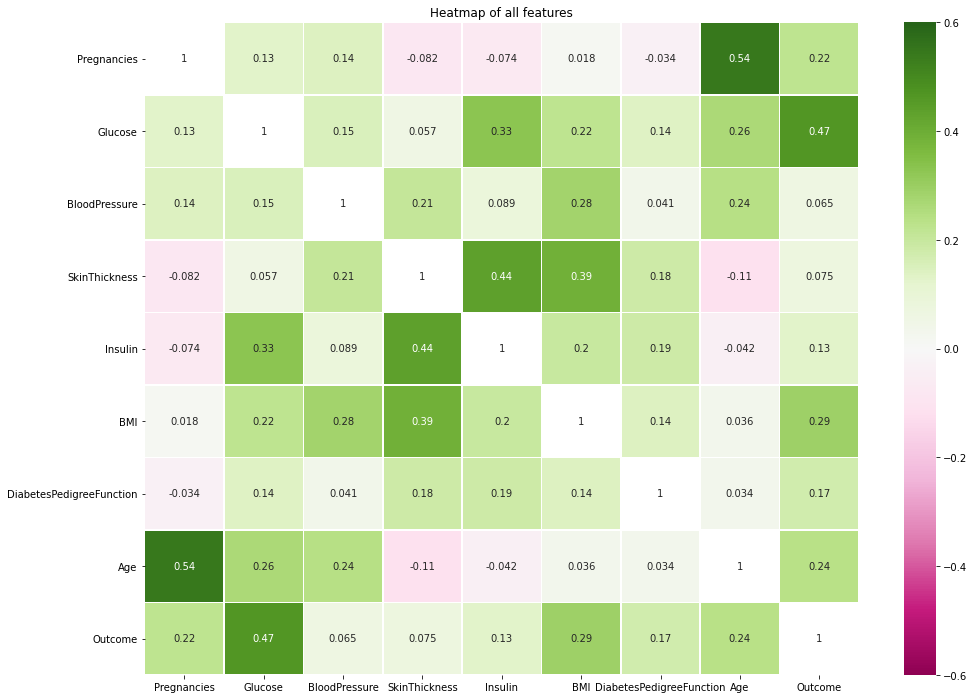

In [12]:
#
# Calculating and plotting a correlation matrix 
#

# Calculating the correlation matrix 
corr_matrix = df.corr()

# Set figure size for seaborn heatmap plot
plt.figure(figsize=(16, 12))

# Create good colormap for heatmap by selecting a colormap with white in middle and set highest positive value
# to white to 'blank' the diagonal
heat_cmap = matplotlib.cm.get_cmap('PiYG')
heat_cmap.set_over('w')

#
#Create heatmap plot with pastel colors for low negative and positive correlation coefficients and
# darker green and magenta for higher values.
#
# Set scale to create a symmetric distribution.
#
heat_plot = sns.heatmap(corr_matrix, annot=True, linewidths=.5, robust=True, cmap=heat_cmap, vmin=-0.6, vmax=0.6)

# Set the plot title. Use None to prevent text to stdout. 
heat_plot.set_title("Heatmap of all features")
None

### Heatmap analysis - all data

* No features with negative corr coef with Outcome. 

* Features with a higher correlation (>0.4) with Outcome : Glucose

* Strong positive correlation (0.54) and possibly colinear features: Age & Pregnancies and also Insulin with Skin thickness (0.44)

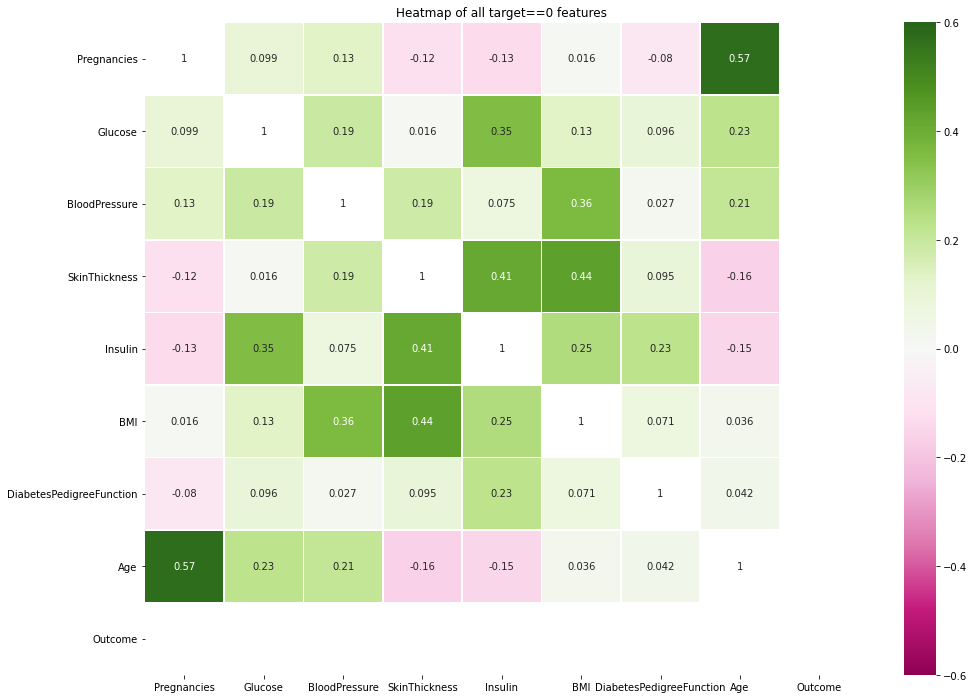

In [13]:
#
# Calculating and plotting a correlation matrix for target==0 
#

# Calculating the correlation matrix 
corr_matrix = df_outcome_0.corr()

# Set figure size for seaborn heatmap plot
plt.figure(figsize=(16, 12))

# Create heatmap plot with pastel colors for low negative and positive correlations and darker green and magenta for higher values.
# Hard coded scale to create a symmetric distribution.
g = sns.heatmap(corr_matrix, annot=True, linewidths=.5, robust=True, cmap=heat_cmap, vmin=-0.6, vmax=0.6)

# Set the plot title. Use None to prevent text to stdout. 
g.set_title("Heatmap of all target==0 features")
None

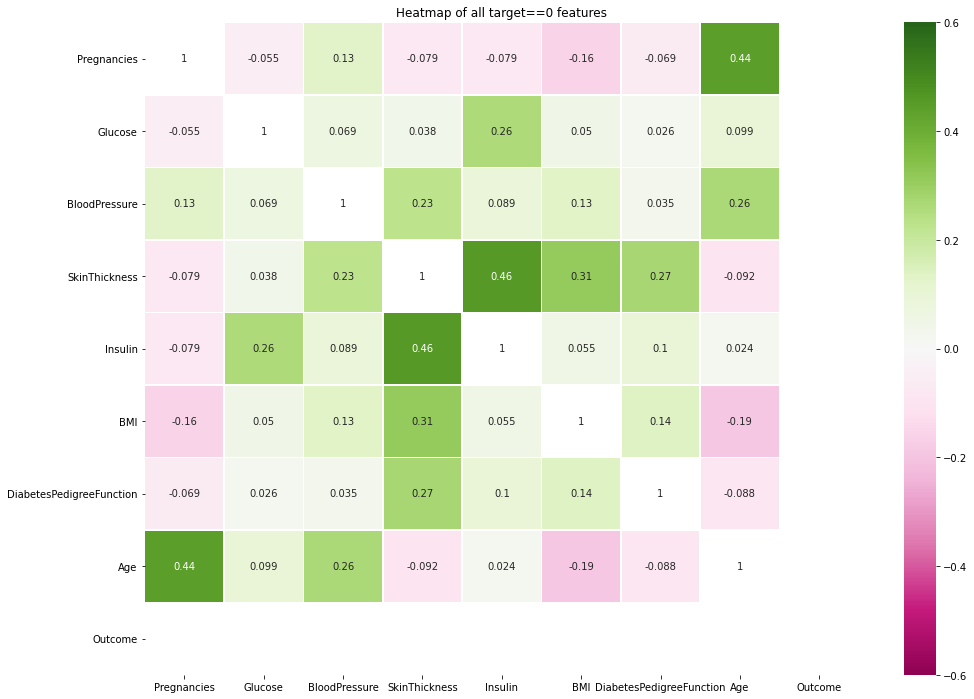

In [14]:
#
# Calculating and plotting a correlation matrix for target==1 
#

# Calculating the correlation matrix 
corr_matrix = df_outcome_1.corr()

# Set figure size for seaborn heatmap plot
plt.figure(figsize=(16, 12))

# Create heatmap plot with pastel colors for low negative and positive correlations and darker green and magenta for higher values.
# Hard coded scale to create a symmetric distribution.
g = sns.heatmap(corr_matrix, annot=True, linewidths=.5, robust=True, cmap=heat_cmap, vmin=-0.6, vmax=0.6)

# Set the plot title. Use None to prevent text to stdout. 
g.set_title("Heatmap of all target==0 features")
None

### Heatmap analysis for subsets

* More features with slightly stronger negative corr coef's.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


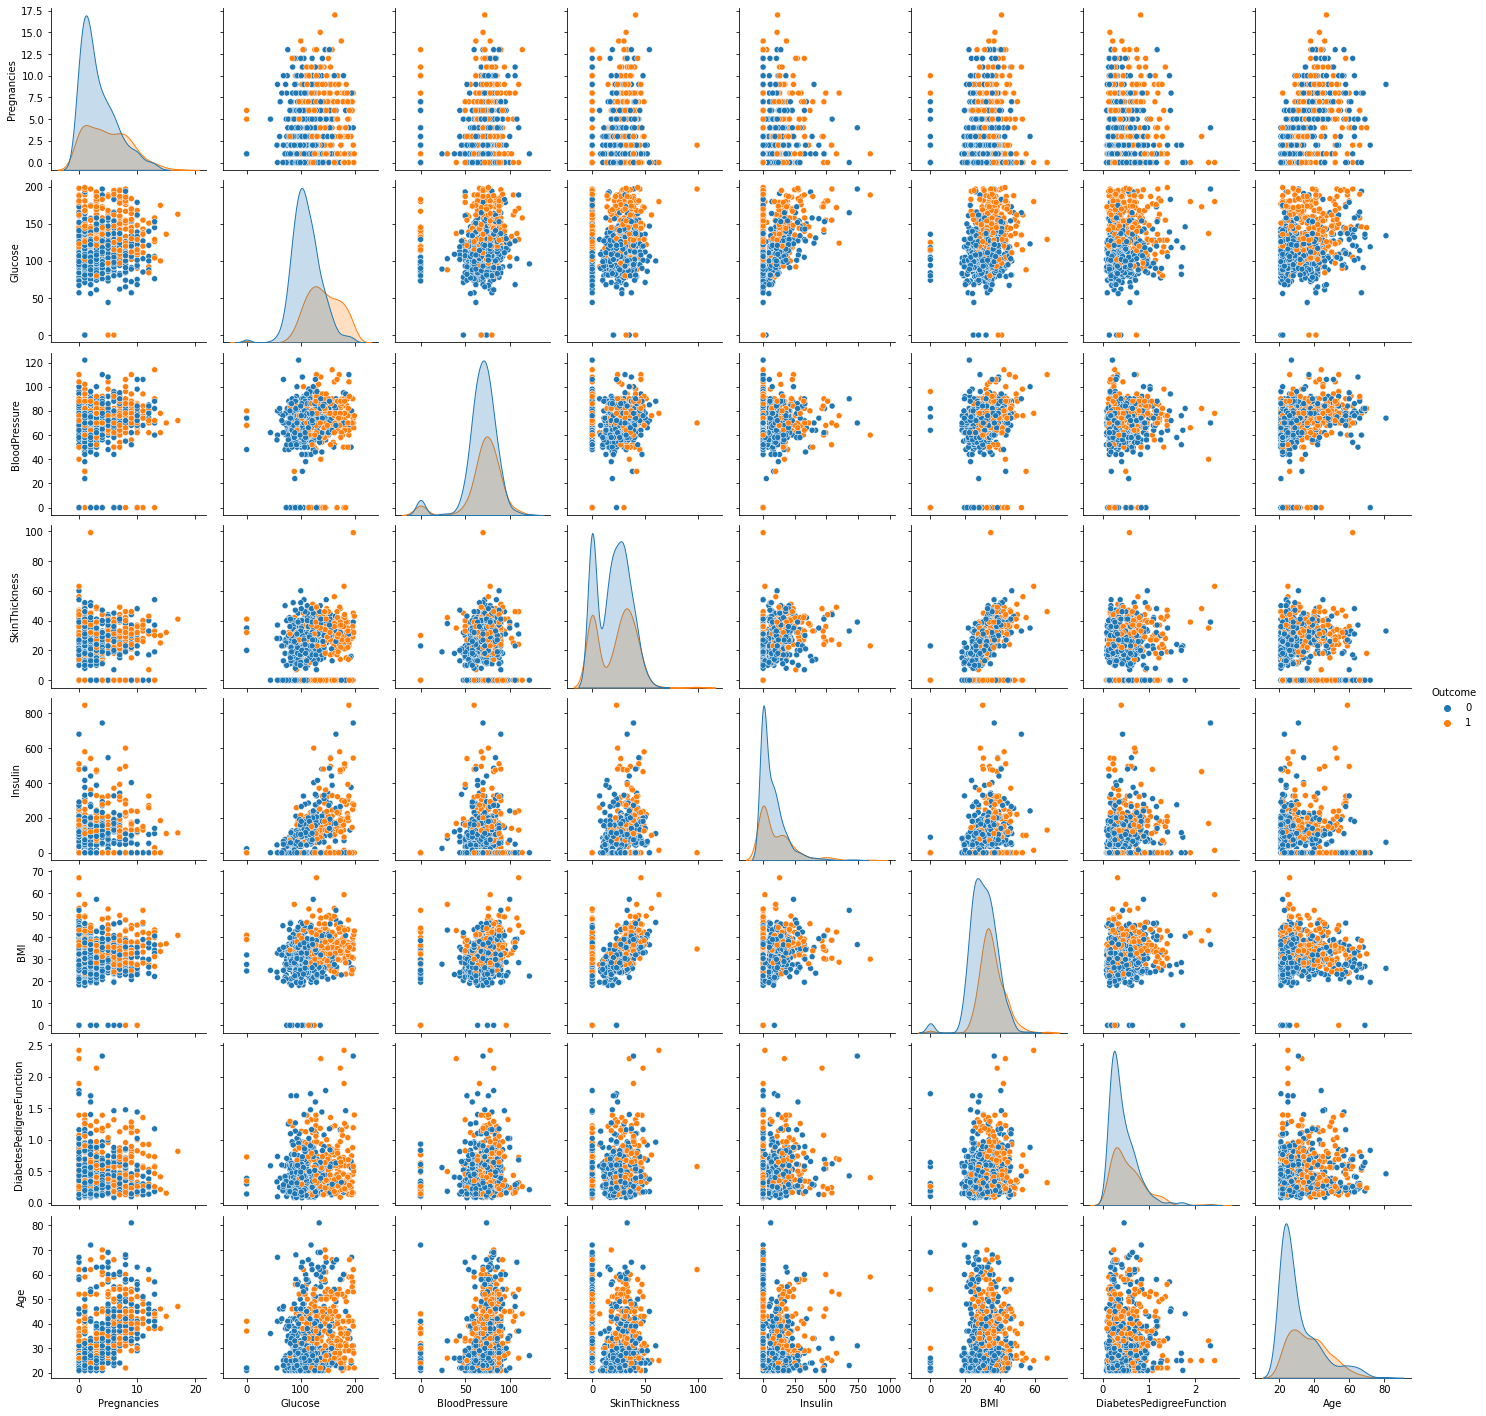

In [16]:
# Switch off warnings to avoid annoying warnings
warnings.filterwarnings('ignore')
sns.pairplot(df, hue='Outcome')
# Switch on warnings
warnings.filterwarnings('default')


In [17]:
#
# Removing measurements with one or more zeroes
#
print(df.shape)
df_rem_0 = df.drop(df[df['SkinThickness'] == 0].index, inplace=False).copy()
print(df_rem_0.shape)
df_rem_0 = df.drop(df[df['Insulin'] == 0].index, inplace=False).copy()
print(df_rem_0.shape)

(768, 9)
(541, 9)
(394, 9)


In [18]:
df_rem_0.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,394.0,3.286802,3.209635,0.000,1.00000,2.0000,5.000,17.00
Glucose,394.0,122.304569,31.396725,0.000,99.00000,119.0000,143.000,198.00
BloodPressure,394.0,70.654822,12.469919,24.000,62.00000,70.0000,78.000,110.00
SkinThickness,394.0,29.106599,10.504273,7.000,21.00000,29.0000,36.750,63.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.000,846.00
BMI,394.0,32.988579,7.210160,0.000,28.32500,33.2000,37.075,67.10
DiabetesPedigreeFunction,394.0,0.525543,0.350127,0.085,0.27025,0.4495,0.687,2.42
Age,394.0,30.814721,10.198971,21.000,23.00000,27.0000,36.000,81.00
Outcome,394.0,0.329949,0.470792,0.000,0.00000,0.0000,1.000,1.00


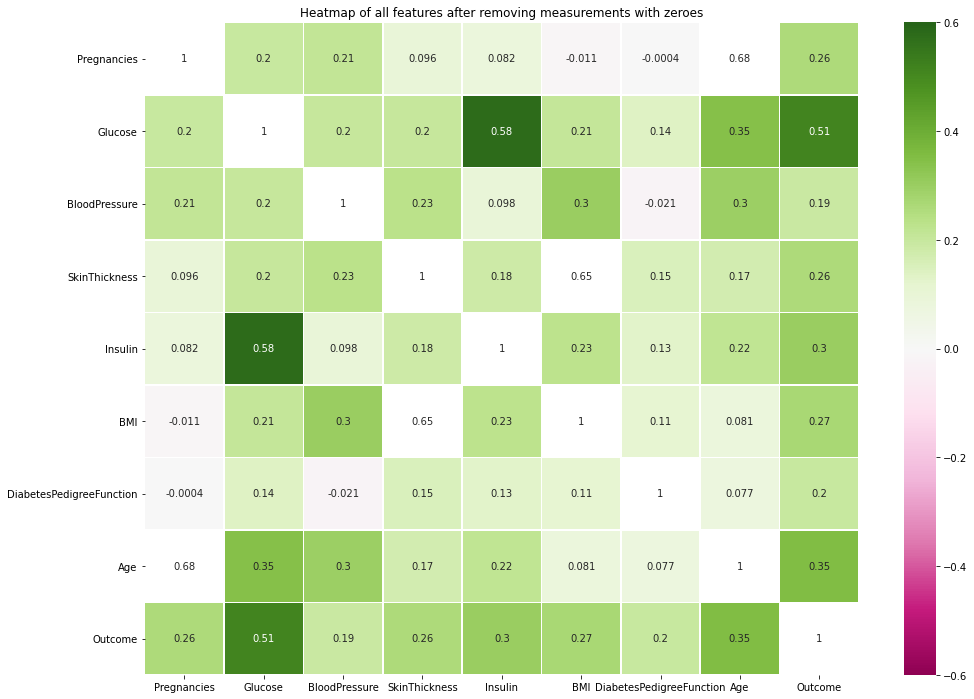

In [19]:
#
# Calculating and plotting a correlation matrix for reduced dataset

# Calculating the correlation matrix 
corr_matrix = df_rem_0.corr()

# Set figure size for seaborn heatmap plot
plt.figure(figsize=(16, 12))

# Create heatmap plot with pastel colors for low negative and positive correlations and darker green and magenta for higher values.
# Hard coded scale to create a symmetric distribution.
g = sns.heatmap(corr_matrix, annot=True, linewidths=.5, robust=True, cmap=heat_cmap, vmin=-0.6, vmax=0.6)

# Set the plot title. Use None to prevent text to stdout. 
g.set_title("Heatmap of all features after removing measurements with zeroes")
None

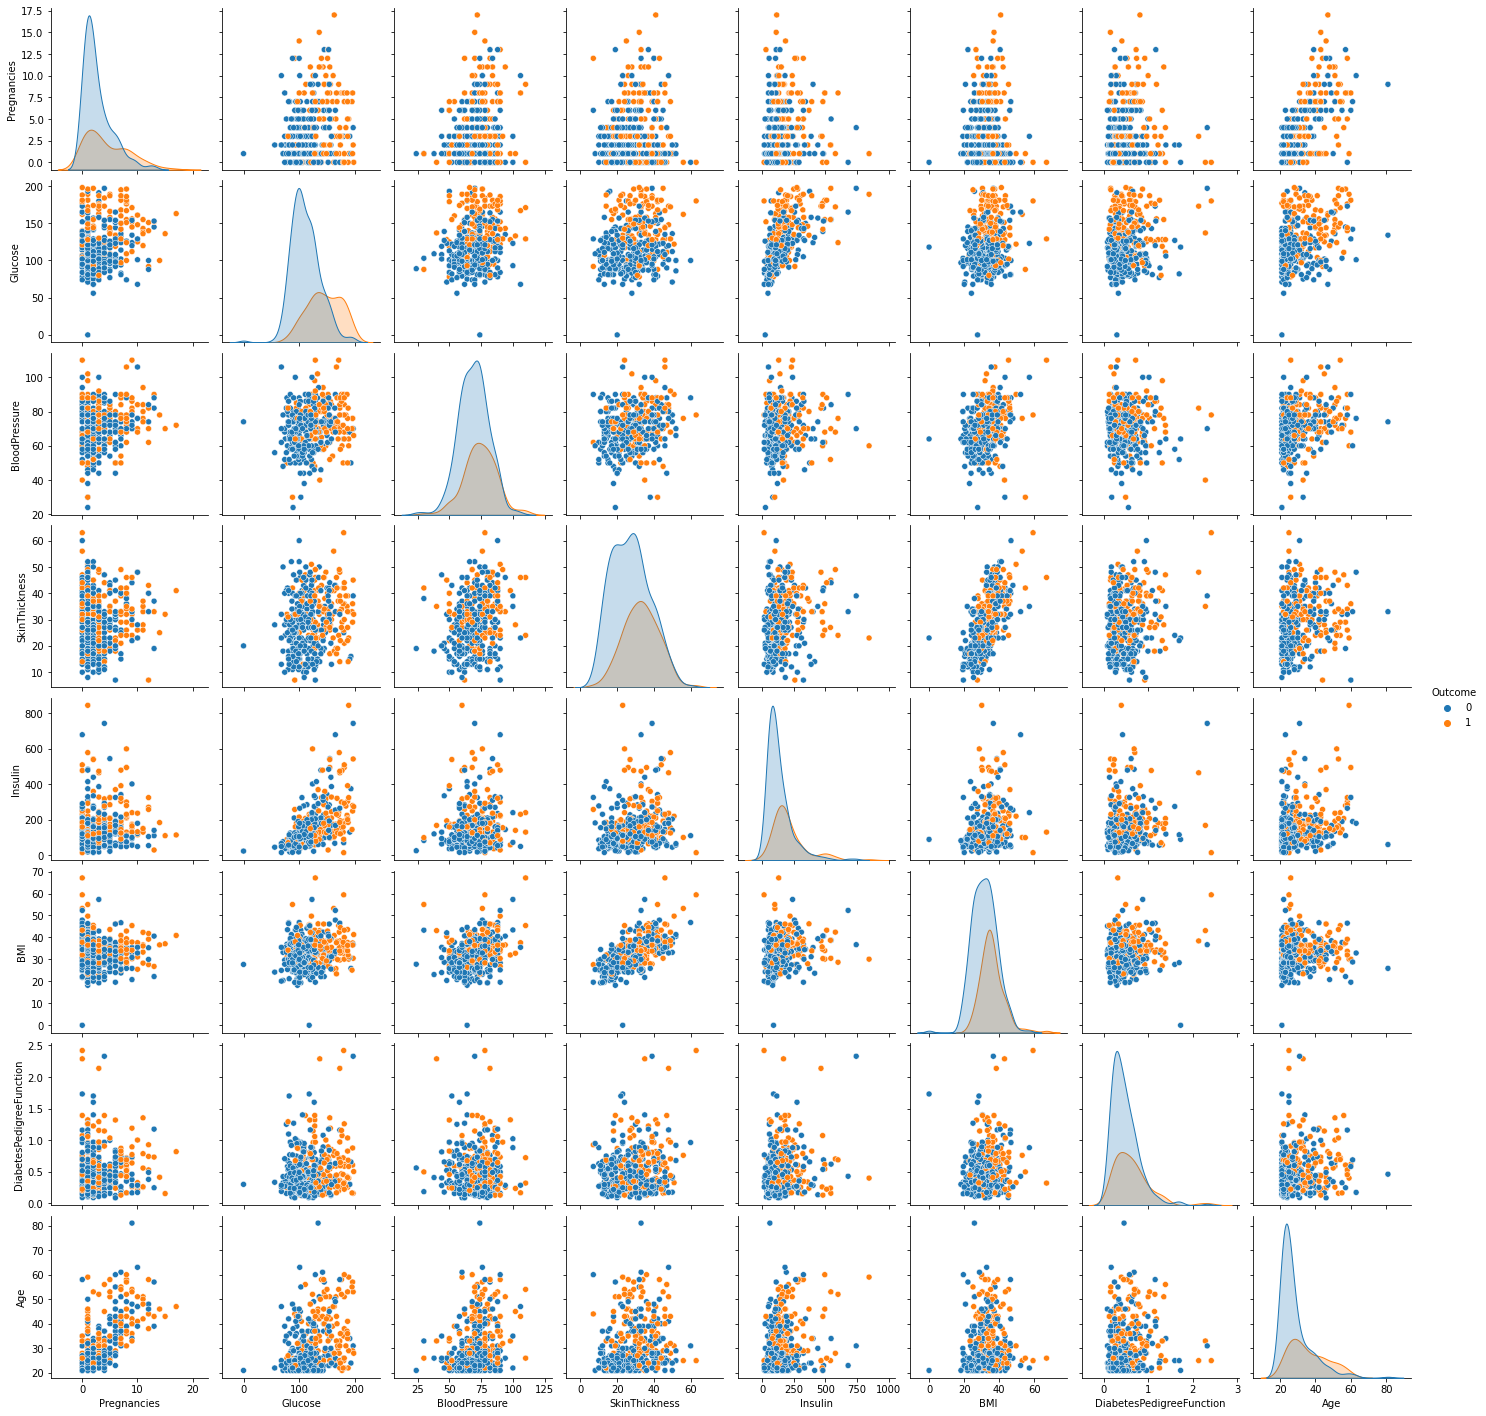

In [20]:
# Switch off warnings to avoid annoying warnings
warnings.filterwarnings('ignore')
sns.pairplot(df_rem_0, hue='Outcome')
# Switch on warnings
warnings.filterwarnings('default')

### Analysis

The removal of all measurements with zero values has removed 374 measurements. Instead of removal an imputing strategy can also be tested. 

# Modeling

In [21]:
#
# Select which feature engineering steps you would like to apply. 
#   1. log transform of features with skew > 0.75.
#   2. Delete selected columns with low correlations coefficients
#
log_transform = False
del_cols = False
option_string='Feature engineering steps applied: '

df = df_rem_0

In [22]:
#
# 1. log transform of features with skew > 0.75.
#

if log_transform:
    # Determine numeric columns
    num_cols = df.select_dtypes(include='number').columns

    # Calculate skew for each numeric feature and select features with skew>0.75 
    calc_skew_col = df[num_cols].skew()
    skew_cols = list(calc_skew_col[calc_skew_col > 0.75].index)

    print(f"\nLog transforming following features: {skew_cols}\n")
    option_string = option_string + ' Log transform '
    
    for column in skew_cols:
        df.loc[:,column] = np.log(df[column]+0.00000001)

In [23]:
#
# 2. Delete selected columns with low correlations coefficients
#
if del_cols:
    # Drop columns 
    drop_cols = ['fasting_blood_sugar','rest_ecg_left ventricular hypertrophy','rest_ecg_normal','cholesterol']    
    df.drop(columns=drop_cols, inplace=True)
    print(f"\nDropping columns {drop_cols}\n")
    option_string = option_string + ' Columns with low correlations coefficients dropped'

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               394 non-null    int64  
 1   Glucose                   394 non-null    int64  
 2   BloodPressure             394 non-null    int64  
 3   SkinThickness             394 non-null    int64  
 4   Insulin                   394 non-null    int64  
 5   BMI                       394 non-null    float64
 6   DiabetesPedigreeFunction  394 non-null    float64
 7   Age                       394 non-null    int64  
 8   Outcome                   394 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 30.8 KB


In [25]:
#
# Define feature set X and target y and split in random training and testing datasets
#
X= df.drop(columns=['Outcome'], inplace=False).copy()
y= df['Outcome'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

### Confusion Matrix, precision and recall

The confusion Matrix is defined as: $\left(\begin{array}{cc}True Neg & False Pos\\False Neg & True Pos\end{array}\right)$ or in abbreviated form: $\left(\begin{array}{cc}TN & FP\\FN & TP\end{array}\right)$.

Precision is defined as $\frac{(TruePos)}{(TruePos +FalsePos)}$ or $\frac{(TP)}{(TP +FP)}$

Recall is defined as $\frac{(TruePos)}{(TruePos +FalseNeg)}$ or $\frac{(TP)}{(TP +FN)}$


Precision can be used as model metric to select the best model when there is a high cost associated with a False Positive .

Recall can be used as model metric to select the best model when there is a high cost associated with a False Negative.

In code:

```code
cm=disp.confusion_matrix

TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]

precision = TP / (TP+FP)
recall    = TP / (TP+FN)
```





    Overview of Precision and Recall for each classifier followed by confusion matrix for each
    Classifier : LogisticRegression              Precision : 0.93              Recall : 0.60           
    Classifier : RandomForestClassifier          Precision : 0.84              Recall : 0.60           
    Classifier : GaussianNB                      Precision : 0.82              Recall : 0.63           
    Classifier : KNeighborsClassifier            Precision : 0.80              Recall : 0.47           
    Classifier : GradientBoostingClassifier      Precision : 0.78              Recall : 0.67           
    Classifier : SVC                             Precision : 0.86              Recall : 0.58           

    Feature engineering steps applied: 



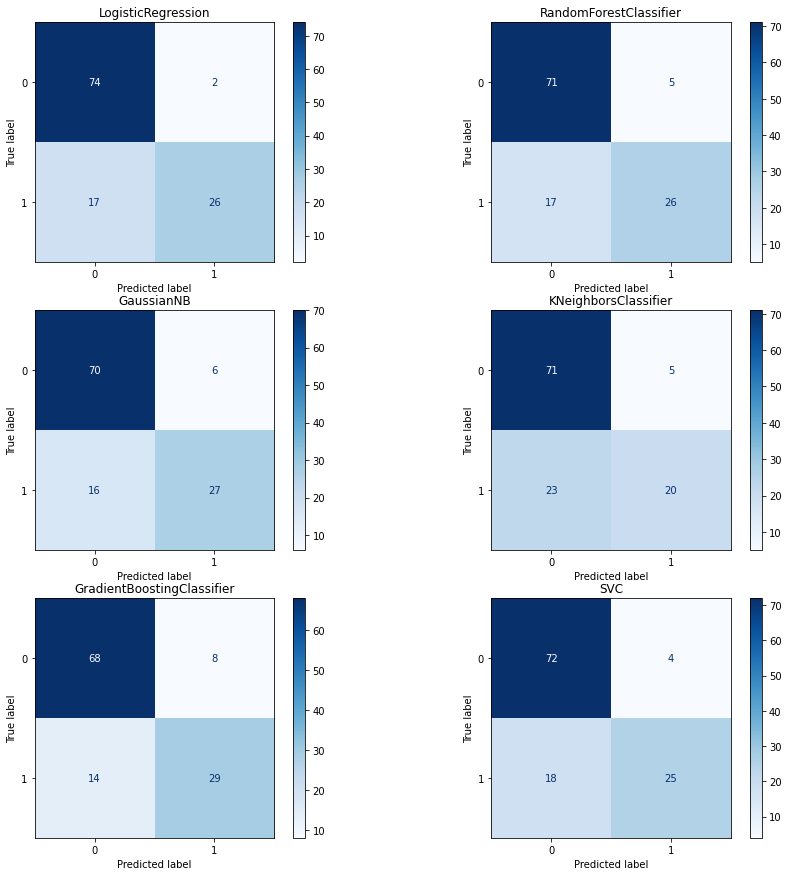

In [26]:
#
# Run 6 different classifiers and print precision and recall and plot confusion matrices for each 
#

classifiers = [LogisticRegression(max_iter=5000), 
               RandomForestClassifier(criterion='entropy', random_state=0),
               GaussianNB(),
               KNeighborsClassifier(11),
               GradientBoostingClassifier(), 
               SVC(kernel='linear', C=0.01)
               ]

for cls in classifiers:
    cls.fit(X_train, y_train)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15))

print(f'\n\033[1m    Overview of Precision and Recall for each classifier followed by confusion matrix for each\033[0m')
for cls, ax in zip(classifiers, axes.flatten()):
    disp=plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues',
                         normalize=None)
    ax.title.set_text(type(cls).__name__) 
    
    cm=disp.confusion_matrix

    tn = cm[0,0]
    fp = cm[0,1]
    fn = cm[1,0]
    tp = cm[1,1]

    precision = tp / (tp+fp)
    recall    = tp / (tp+fn)

    print(f'    Classifier : {type(cls).__name__:<30}  Precision : {precision:<15.2f}   Recall : {recall:<15.2f}')
    
print(f'\n    {option_string}\n')
plt.show()

### Result analysis

Dataset without all  records: 
* Best Precision performance from LogisticRegression classifiers (0.71). 
* Best Recall performance from GradientBoostingClassifier (0.59)

Dataset without 374 records with zero measurements: 
* Best Precision performance from LogisticRegression classifiers (0.93). 
* Best Recall performance from GradientBoostingClassifier (0.67)

No impact from Log Transform of features with skew


***

### RandomForestClassifier hyperparameters - try to improve performance by optimising hyperparameters
1. n_estimators = number of trees in the foreset
2. max_features = max number of features considered for splitting a node
3. max_depth = max number of levels in each decision tree
4. min_samples_split = min number of data points placed in a node before the node is split
5. min_samples_leaf = min number of data points allowed in a leaf node
6. bootstrap = method for sampling data points (with or without replacement)

In [27]:
#
# Define function to evaluate a model and return confusion matrix, precision and recall
#
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    tn = cm[0,0]
    fp = cm[0,1]
    fn = cm[1,0]
    tp = cm[1,1]

    precision = tp / (tp+fp)
    recall    = tp / (tp+fn)

    return cm, precision, recall


In [28]:
#
# Run 'Base' RandomForestClassifier with default parameters
#

clf_base = RandomForestClassifier(random_state=0)
      
clf_base.fit(X_train, y_train)

base_cm, base_precision, base_recall = evaluate(clf_base, X_test, y_test)


In [30]:
#
# Use Random search to find hyperparameters for Grid Search
#

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 20, num = 10)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_param = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


# Initiate the RandomForestClassifier model 
clf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

random_search = RandomizedSearchCV(estimator = clf, scoring='precision', param_distributions = random_param, n_iter = 50, cv = 3, verbose=2,random_state=42, n_jobs = -1)

# Fit the random search to the data
random_search.fit(X_train, y_train)
random_search.best_params_
best_random = random_search.best_estimator_

# Evaluate best model 
rand_cm, rand_precision, rand_recall = evaluate(best_random, X_test, y_test)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  3.1min finished


In [31]:
random_search.best_params_

{'bootstrap': True,
 'max_depth': 2,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [32]:
#
# Create the parameter grid based on the results of random search to set up a gridsearch
#

param_grid = {
    'bootstrap': [True],
    'max_depth': [1, 2, 3],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [4, 5, 6],
    'n_estimators': [100, 200, 300]
}

# Initiate the RandomForestClassifier model 
clf = RandomForestClassifier(random_state=0)

# Initiate the grid search model
grid_search = GridSearchCV(estimator = clf, scoring='precision', param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_
best_grid = grid_search.best_estimator_

# Evaluate best model 
grid_cm, grid_precision, grid_recall = evaluate(best_grid, X_test, y_test)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   39.4s
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:  1.0min finished


In [34]:
print(f'\n\033[1mOverview of Precision and Recall for several classificsation runs with RandomForestClassifier\033[0m')
print(f'Classifier : {type(clf).__name__:<25} Base model      Precision : {base_precision:<8.2f}   Recall : {base_recall:<8.2f}')
print(f'Classifier : {type(clf).__name__:<25} Random search   Precision : {rand_precision:<8.2f}   Recall : {rand_recall:<8.2f}')
print(f'Classifier : {type(clf).__name__:<25} Grid search     Precision : {grid_precision:<8.2f}   Recall : {grid_recall:<8.2f}')


print(f'\nBase Confusion matrix')
print(f'{base_cm[0]}')
print(f'{base_cm[1]}')

print(f'\nRandom Search Confusion matrix')
print(f'{rand_cm[0]}')
print(f'{rand_cm[1]}')

print(f'\nGrid Search Confusion matrix')
print(f'{grid_cm[0]}')
print(f'{grid_cm[1]}')


Overview of Precision and Recall for several classificsation runs with RandomForestClassifier
Classifier : RandomForestClassifier    Base model      Precision : 0.81       Recall : 0.60    
Classifier : RandomForestClassifier    Random search   Precision : 0.89       Recall : 0.40    
Classifier : RandomForestClassifier    Grid search     Precision : 1.00       Recall : 0.12    

Base Confusion matrix
[70  6]
[17 26]

Random Search Confusion matrix
[74  2]
[26 17]

Grid Search Confusion matrix
[76  0]
[38  5]


In [35]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 1,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100}